# Chapter 19. Tutorial

In this tutorial, we will implement a complete machine learning pipeline. The aim of this code is to show the facility and practicality to implement your pipelines in Python.

Ok. Before we even start to implement our pipeline, it is necessary to perform some previous steps in our code.

recorte
This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

Following is the code to do this.
Let’s start by getting your hands on the data. 

The Dogs vs. Cats dataset that you’ll use isn’t packaged with Keras. It was made available by Kaggle as part of a computer-vision competition in late 2013, back when convnets weren’t mainstream. You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data (you’ll need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless).

### Importing helper libraries

It is good practice to begin the code file by importing all the libraries you will need in your analysis. In this tutorial, we will use the following main libraries:
    - pandas
    - numpy
    - matplotlib and seaborn
    - scikit-learn
    
To make the code clearer, it is common to import certain libraries and assigning it a nickname. For example, the  pandas library is typically imported as **pd**. This way, we simply type pd every time we want to call the pandas library. 

In [1]:
#Store and organize output files
from pathlib import Path

#Manipulate data
import numpy as np
import pandas as pd

#Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Statistical tests
import scipy.stats as stats

#Machine learning
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif

# Ignore WARNING
import warnings
warnings.filterwarnings('ignore')

### Set random seed

In our analysis, there will be some elements of randomness. For example, we might want to remove some participants at random during data cleaning. Likewise, when defining the cross-validation scheme (CV), the train/test partition at each iteration is also done at random. In Python, this randomness can be controlled by setting a "seed value" to a fixed value. Not defining a specific seed value means that the variables that rely on this element of randomness will have a different value every time you run your code. For example, the division of participants between the train and test sets will be different, which will likely lead to a different result.

Setting the seed value guarantees that you will get the same results every time you run your code.

In [2]:
random_seed = 1
np.random.seed = random_seed

### Organize your workspace

First, we will create the structure of folders where you can store all your results. During your projects, you might test different strategies to perform the machine learning pipeline. As we mentioned before, the machine learning analysis is performed by several trials and errors (e.g., try different models, try different preprocessing, etc.). After a lot of testing, it will be easy to feel lost. So, give your experiment a name, create a folder in the results directory with the same name, and store your experiment outputs is this local.

In [3]:
results_dir = Path('./results')
results_dir.mkdir(exist_ok=True)

experiment_name = 'linear_SVM_example'
experiment_dir = results_dir / experiment_name
experiment_dir.mkdir(exist_ok=True)


## 1. Problem formulation
With your environment set, we can perform the first step in your machine learning pipeline: *the definition of our machine learning problem*.

Usually, this step is performed even before we start to write the source code. The goals of our analysis should be discussed when defining our research question; when you are defining your project scope. This will help to orient what you will do and not do, which data we should collect, and what kind of analysis we will perform. In this tutorial, our machine learning problem is: 

*We will use structural MRI data to classify subjects in two groups: healthy control and patients with schizophrenia.*

**Consider adding a Figure very high level showing the problem**

In the previous sentence, we can find all the important elements when defining a machine learning problem. We have:

- **Features**: Structural MRI data
- **Task**: Classification
- **Target**: Patients with schizophrenia and Healthy Control

Having your problem well framed is essential when conducting any kind of project, and it makes easier to share the objectives of your experiments with other team members.

## 2. Data Preparation

In this step, we will start getting your hands on the data. The idea is to perform a series of analysis to get our data ready for the machine learning models. For this reason, the first steps will involve reading the data and performing a lot of exploratory analysis. Different analyses should be involved depending on the nature of your problem and the type of data. 

### 2.1. Loading the data

In this example, we will use tabular data with columns as the features, targets and demographic data, and rows as participants. The data are stored as a Comma-Separated Values (CSV) file. We will use the library pandas to load and explore the data. 

From pandas, we use the function read_csv() to load the csv file containing our data. This will load the data into an object type called dataframe.

In [4]:
## decide how we load the data in the text version of the book: 1) provide a download link, 2) run code to download it automatically into a specific directory using !wget command

In [5]:
dataset_df = pd.read_csv("./Chapter_19_data.csv")

Let's start by seeing the first six rows of the data. Selecting subsections ("slicing") of a dataframe using pandas is straightforward. There are different ways to do this. Here, we simply retrieve the six rows from the dataframe data (note that the first column is indexed 0 and the last column is not included).

In [6]:
>>> dataset_df[0:6]

,ID,label,Gender,Age,Left Lateral Ventricle,Left Inf Lat Vent,Left Cerebellum White Matter,Left Cerebellum Cortex,Left Thalamus Proper,Left Caudate,...,rh rostralanteriorcingulate thickness,rh rostralmiddlefrontal thickness,rh superiorfrontal thickness,rh superiorparietal thickness,rh superiortemporal thickness,rh supramarginal thickness,rh frontalpole thickness,rh temporalpole thickness,rh transversetemporal thickness,rh insula thickness
0,c045,0,0,23.176965,4914.012999,277.612999,13639.31300,45034.11300,5921.012999,3816.512999,...,2.123999,2.367999,2.631999,2.065999,2.353999,2.429999,2.346999,2.205999,2.007999,2.508999
1,c060,0,1,25.423204,3702.102164,91.702164,12921.20216,41767.80216,6960.302164,3444.202164,...,2.152164,2.277164,2.823164,2.143164,2.526164,2.487164,2.726164,2.926164,2.030164,2.550164
2,c248,0,0,24.749615,10267.711230,259.511229,15274.71123,56189.71123,8194.011229,3405.911229,...,2.971229,2.310229,2.736229,2.142229,3.063229,2.746229,2.953229,4.066229,2.419229,3.088229
3,c009,0,0,21.694650,4492.206313,107.106313,16172.30631,46163.10631,7103.306313,4027.606313,...,2.271313,2.561313,2.783313,2.213313,2.392313,2.413313,2.882313,2.388313,2.581313,2.745313
4,c030,0,0,23.964645,4270.705179,298.305179,12021.10518,45176.30518,7052.405179,3224.505179,...,2.715179,2.353179,2.789179,2.156179,2.879179,2.489179,2.765179,3.502179,2.292179,2.834179
5,c365,0,0,25.684447,4107.105258,121.405258,14418.80526,65958.90526,10132.905260,3437.205258,...,3.079258,2.656258,2.930258,2.263258,3.067258,2.721258,2.527258,4.275258,2.520258,3.106258


Inside the dataset_df variable, we can see the column names at the top and the contents of the first six participants. The columns include the ID, age and gender, as well as the gray matter volume for several brain regions. We can see that there is at least one value missing. We will deal with this later. 

It may be useful to know all the features that are available in the dataset. To do this, we simply ask for the names of the columns of our data.

In [7]:
>>> dataset_df.columns.tolist()

['ID',
 'label',
 'Gender',
 'Age',
 'Left Lateral Ventricle',
 'Left Inf Lat Vent',
 'Left Cerebellum White Matter',
 'Left Cerebellum Cortex',
 'Left Thalamus Proper',
 'Left Caudate',
 'Left Putamen',
 'Left Pallidum',
 'rd Ventricle',
 'th Ventricle',
 'Brain Stem',
 'Left Hippocampus',
 'Left Amygdala',
 'CSF',
 'Left Accumbens area',
 'Left VentralDC',
 'Right Lateral Ventricle',
 'Right Inf Lat Vent',
 'Right Cerebellum White Matter',
 'Right Cerebellum Cortex',
 'Right Thalamus Proper',
 'Right Caudate',
 'Right Putamen',
 'Right Pallidum',
 'Right Hippocampus',
 'Right Amygdala',
 'Right Accumbens area',
 'Right VentralDC',
 'CC Posterior',
 'CC Mid Posterior',
 'CC Central',
 'CC Mid Anterior',
 'CC Anterior',
 'lh bankssts volume',
 'lh caudalanteriorcingulate volume',
 'lh caudalmiddlefrontal volume',
 'lh cuneus volume',
 'lh entorhinal volume',
 'lh fusiform volume',
 'lh inferiorparietal volume',
 'lh inferiortemporal volume',
 'lh isthmuscingulate volume',
 'lh lateralo

Now that we know what features we are dealing with, let's check the size of the data.

In [8]:
print("Number of features =", dataset_df.shape[1])
print("Number of participants =", dataset_df.shape[0])

Number of features = 173
Number of participants = 740


In this example, our data preparation stage will check the dataset for the presence of:
 - Missing data 
 - Data imbalance with respect to the labels
 - Confounding variables
 

### 2.3. Missing data

Many machine learning algorithms do not support data with missing values. Therefore, it is important to check if there are any missing values in our data. There are many different ways to do this. Here we will build our own function to loop through each the column in the dataframe data (note data we are also including gender and age) and get the feature name and Id for the corresponding missing values.


In [9]:
# RAFAEL DO REVIEW THIS FUNCTION

def detect_nan(dataset):
    nan_total = dataset.isnull().sum().sum() 
    if nan_total > 0:
        for column in dataset:          
            #Find Ids with nan - THIS IS PROBABLY OVERLY COMPLICATED (all I want here is to get the Ids of where the nans are so I can print them later on)
            nan = dataset[column].isnull()
            dataset["nan"] = nan 
            ids = []
            for i in dataset["nan"]:
                if i == True:
                    id_nan = dataset.loc[dataset["nan"] == True, 'ID']
                    ids.append(id_nan)               
            #Calculate total number of nan for each feature and Id
            nan_sum = nan.sum()          
            if nan_sum > 0:
                print("Found", nan_sum, "missing value(s) for", column, "for Id(s):", *ids[0])             
        #dataset = dataset.drop(columns=["nan"])
    else:
        print("There are no missing data in this dataset!")
        print("")

In [10]:
>>> detect_nan(dataset_df)

Found 43 missing value(s) for Age for Id(s): p149 p150 p156 p157 p168 p175 p195 p196 p197 p210 p211 p212 p227 p228 p229 p264 p265 p266 p267 p268 p269 p270 p271 p281 p282 p283 p289 p302 p303 p307 p311 p312 p319 p321 p356 p357 p358 p359 p360 p361 p362 p363 p364


From the output, we can check that there are 12 missing values for gender and age. There are several options to go from here with different degrees of complexity (see Chapter x for a more in-depth description). In this example, we will simply remove the participants with missing data. Not having this information does not allow for a thorough assessment of imbalanced demographic data, which could be problematic. There are sophisticated options to input missing data however they all come with disadvantages. Since removing these participants would only result in losing x% of the total data, this option will not result in a large drop in sample size. We can remove missing data using the function .dropna() from pandas.

In [11]:
dataset_df = dataset_df.dropna()

print("Number of participants =", dataset_df.shape[0])

Number of participants = 697


As expected, the new dataframe has now x less participants than before.

### 2.4. Class imbalance

Next, let's check the number of total participants in each class.  

In [12]:
>>> dataset_df['label'].value_counts()

0    368
1    329
Name: label, dtype: int64

From the output, we can see that there are 740 participants in total, 368 patients and 372 controls. There does not seem to be a large imbalance between classes. However, they are not perfectly matched. One option would be to downsample the HC to match the SZ group. However, this would mean losing some data. Since the imbalance is not too large, we will use balanced accuracy as our metric of choice as well as a stratified CV to ensure the same proportion SZ/HC across the CV iterations. 


### 2.5. Confounding variables

Next, let's check for the balance of some obvious confounding variables: gender and age. First, let's see the distribution of gender between the two classes. This time, we will use some plots from the seaborn library. Plotting data using seaborn is straightforward. Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. For more information see https://seaborn.pydata.org. Seaborn operates  based on matplotlib, the most widely used plotting library. Therefore, we will also import it. You can find out more about matplotlib here https://matplotlib.org.

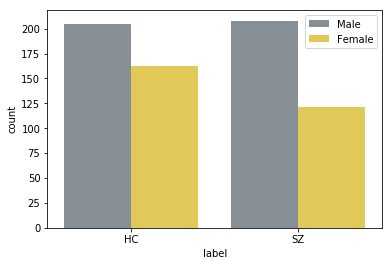

In [13]:
ax = sns.countplot(x="label", hue="Gender", data=dataset_df, palette=['#839098', '#f7d842'])

plt.legend(["Male", "Female"])
plt.xticks([0,1], ["HC", "SZ"])

plt.show()

We can see that there is a fairly similar number of males in the two groups. However, the control group has more females than the patient group. Let's run a Chi-squared test of homogeneity to check if this difference is statistically significant. In this case, we want to test the hipotheses that the proportion of women in the healthy control group is the same proportion of women in the patient group (or the proportion of men in the healthy control group is the same proportion of men in the patient group).

$$H_{0}: Proportion\ men/women_{Healthy control} =  Proportion\ men/women_{Patients}$$

In [14]:
# Create the contigency table
tab = pd.crosstab(dataset_df["Gender"], dataset_df["label"])
print(tab)
print("")

# Perform the homogeneity test
chi2, p_value, _, _ = stats.chi2_contingency(tab, correction=False)
print('chi2 = %.3f' % chi2)  
print('p-value = %.3f' % p_value)

label     0    1
Gender          
0       205  208
1       163  121

chi2 = 4.064
p-value = 0.044


The results above show that there is indeed a statistically significant difference between the two classes with respect to gender (p-value < 0.05). This may be an issue, as the impact of gender on brain morphology has been well-established. Therefore, the machine learning model may use brain features that are associated with gender differences to distinguish between HC and SZ, as opposed to differences related to the disorder.

To mitigate the bias that this imbalance would introduce in our model, we will downsample the number of females in the HC class by randomly selecting and removing the necessary amount of participants to match the number of females in the SZ group. From the output above we can see that there are 163 and 120 females in the HC and SZ groups, respectively. Therefore, we will remove 42 females from the HC group.

In [16]:

while p_value < 0.05:
    #select one female controls at random and get their indexes
    scz_women = dataset_df[(dataset_df['label']==0) & (dataset_df['Gender'] == 1)]
    indexes_to_remove = scz_women.sample(n=1, random_state=1).index
    print('Droping %s'%str(indexes_to_remove))
    #remove them from the data
    dataset_df = dataset_df.drop(indexes_to_remove)
    tab = pd.crosstab(dataset_df["Gender"], dataset_df["label"])
    chi2, p_value, _, _ = stats.chi2_contingency(tab, correction=False)

print(p_value)
    
#Check new sampple size
tab = pd.crosstab(dataset_df["Gender"], dataset_df["label"])
print(tab)

0.053240432090730934
label     0    1
Gender          
0       205  208
1       161  121


We can see that now our proportion of females is the same in the SZ and HC groups.

Next, let's check for any imbalance with respect to age. The idea is to test the null hypothesis that the  mean (or median) of age between the two group is equal. One way to check this is using the parametric Student's t test for two samples. However, one assumption of Student's t test is that both distributions need to be Gaussian shaped. In order to check if age is normally distributed in each group, we will use the Shapiro-Wilk test 

In [ ]:
#Plot normal curve
ax = sns.kdeplot((data2[data2['label']==0]['Age']), color="#839098", label=("HC"), shade=True)
ax = sns.kdeplot((data2[data2['label']==1]['Age']), color="#f7d842", label=("SZ"), shade=True)
plt.show()

#Shapiro test for normality
stat_hc, p_hc = stats.shapiro(data2[data2['label']==0]['Age'])
stat_sz, p_sz = stats.shapiro(data2[data2['label']==1]['Age'])

def normality(group,stat,p):
    print(group)
    print('Statistics = %.3f, p = %.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('The distribution looks Gaussian')
    else:
        print('The distribution does not look Gaussian')
    print("")
    
normality("HC",stat_hc, p_hc)
normality("SZ",stat_sz, p_sz)

From the above we can see that Age is normally distributed for both groups. The distribution, as well as the meand and standard deviation for each group are fairly similar. However, it is good practice to chack for any staticially significant differences. Therefore, we will go ahead and run the two-sample t-test. 

In [ ]:
#Descriptives
mean_hc, sd_hc = (data2[data2['label']==0]['Age']).describe().loc[['mean', 'std']]
mean_sz, sd_sz = (data2[data2['label']==1]['Age']).describe().loc[['mean', 'std']]


age_sz = data2[data2['label']==0]['Age']
age_hc = data2[data2['label']==1]['Age']

statistic, p_value = stats.ttest_ind(age_sz, age_hc)

print('HC: Mean(SD) = %.2f(%.2f)'% (mean_hc, sd_hc))
print('SZ: Mean(SD) = %.2f(%.2f)'% (mean_sz, sd_sz))
print('t = %.2f, p = %.3f' % (statistic, p_value))

There is no statsitically significant difference in age between the two groups. Therefore, we will not consider age as a significant confounder in this example.

There are several ways to deal with confounding variables. The most obvious and simple one would be to downsample one of the groups until their are similar enough with respect to these variables, like we did for gender. Another popular option would be to regress out the confounding variables from each feature and using the residuals as the new features. For more information on confounding variables in neuroimaging and machine learning learning see Rao et al., 2017.

### 2.2. Feature set and target

The target is a categorical variable that determines whether a participant belongs to the HC and SZ group. Therefore, we will refer to the target variable as labels. This variable corresponds to the column named "label" in the dataframe. To create a new variable y with these data, we simply retrieve this column from the dataframe "data". Defining the features in the same way would be impractical, since the are too many to be named individually. Instead, we can select a range of columns based on their location. We already know that there are 173 features in the original data. However, not all are brain region volumes; the relevant features for our model start from the 5th column. Therefore, we select the columns of the dataframe accordingly by retrieving a selection of the data containing all rows from the 5th column onwards. 

In [ ]:
y = dataset_df["label"]
X = dataset_df[dataset_df.columns[2:]]

Checking the final size of the of our variables, we noticed that we are using 700 subjects in this study. This number is is cleary more that the essential to have to perform a machine learning analysis, conformed analysed here (referencia do parper que diz que precisamos ter 120 sujeitos). However, in many cases we will have a small number of subjects. In these studies, it is always important keep this limitation in mind when discussing the results. This required minimum number of subjects highlight the importance to support the sharing innitiative of the public avaiable datasets, like Neuropen.org (https://openneuro.org/).

## 3. FEATURE ENGINEERING

In this step, we want to make all the necessary transformations to our data that can help us build a good model. As described in Chapter 2, this can involve different procedures depending on the nature of the data. In this example, we want to use neuroanatomical data to classify SZ and HC.

### 3.1. Feature extraction

This first step involves extracting brain morphometric information from the raw MRI images. Luckily, this step has already been done for us. The regional grey matter volumes that make up our data X have been extracted with FreeSurfer (REF).

### 3.2. Cross-validation

Before we move on to apply any transformations to our feature set X, we need to split the data into train and test sets. Recall that this is a critical step to ensure independence between the training and test sets. There are different ways in which to do this. In this example, we will use stratified 10-fold cross-validation (CV). See Chapter 2 for an overview and rational of the most commonly used types of CV. 

We first transform the dataframe X into a 2D array of the same shape using the library numpy. This will make it easier later on, as some of the functions will require the data to be in this format. 

In [ ]:
X = X.values.astype('float32')
y = y.values.astype('float32')

Prepare structure to store predictions and coeficients

In [ ]:
predictions_df = data[['ID', 'label']].copy()
predictions_df['predictions'] = np.nan

model_coef_df = pd.DataFrame(columns=data.columns[4:])

Then, we define the parameters of our stratified CV scheme. For that we will create an object from the class StratifiedKFold from the sklearn library. We will call this object 'skf'. 

Notice the argument "random_state" when we are initializing our object skf. This argument allows us to control the element of randomness intrinsic to splitting the total data into train and test sets. In this example, our data comprises of 740 participants in total. In the code above, we have instructed the model to split it into 10 groups (whilst maintaining the SZ/HC ratio similar throughout the CV iterations). Now, there are multiple solutions to this task! Not setting this hyperparameter to a specific value means that, every time you run your code, the participants assigned to each group will differ! Consequently, your results will, very likely, differ as well*. This is something we would like to avoid, at least while we build upon our model to improve it, as we want to be able to reproduce the same results for comparison between different models.

*Importantly to brain disorders research, this is specially true for small sample sizes. For an interesting discussion on the relation between sample size, cross-validation and performance see Varoquax et al. 2018 and Nieuwenhuis et al. 2012.

In [ ]:
n_folds = 10
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)

 Now that the CV is defined, we can loop over each one of the 10 train/test set iterations. At each iteration, we will transform and fit the machine learning algorithm to the training set; and apply the same data transformations and test the algorithm in the test set. 

We can implement the above using a for loop to iterate over the 10 i_folds. At each i_fold, we will have four new variables:
 - X_train and y_train: training set and corresponding labels
 - X_test and y_test: test set and corresponding labels

Because we will be training and testing the machine learning algorithm one iteration at a time, we will create some empty variables where we can store important information from each iteration. In the code below we create four empty arrays of shape 10, one for each performance metric: balanced accuracy (bac), sensitivity (sens), specificity (spec) and error rate. Each array will be populated with each metric from each CV iteration. We also created an empty list coefficients. This is where we will store the weights (coefficient or "importance") from each feature across the CV iterations. Once the CV is finished, we can then calculate the average weight of each feature for the task.

In [ ]:
cv_test_bac = np.zeros((n_folds,))
cv_test_sens = np.zeros((n_folds,))
cv_test_spec = np.zeros((n_folds,))
cv_coefficients = []

for i_fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Let's check how many participants there are in the train and test sets in each iteration of the CV. We can do this by simply asking for the length of y.

In [ ]:
    print("")
    print("k-fold: ", i_fold + 1)
    print("N training set:", len(y_train))
    print("N test set:", len(y_test))

### 3.3. Feature selection 

Our initial feature set contains 169 features. It is reasonable to assume that some features may be more useful than others for distinguishing SZ patients from HC. Removing less relevant features will speed up the training process and may even improve prediction.

This can be done by adding a step known as feature selection to our model. You may recall from Chapter 2 that there are several different ways in which we can implement this step. In this example, we will use a simple univariate approach. Briefly, this approach runs a comparison between the HC and SZ groups for each feature in the training set and selects only a certain amount of features. How the amount of features to keep is determined is up to the researcher. The selected features are then used as input to fit the machine learning model. The same features are then selected from the test set, which are then put through the already trained machine learning model for testing.

In this example, we will use the method f_classif. This method runs an ANOVA for each feature and ranks them accoring to their F-statisitc: the larger the F, the larger the difference between the groups. We then proceed to select only the features with an F-statistic in the top 50%. **--- THIS IS VERY RANDOM, I WOULD PREFER TO USE ONLY THE STATISTICAL SIGNIFICANT FEATURES. WHAT DO YOU THINK? I TRIED BUT I COULD ONLY GET THE P-VALUES, I DON'T KNOW HOW TO PASS THEM IN THE SELECTOR..I WILL EXPLAIN THE CODE BELOW BETTER ONCE WE AGREE ON HOW TO SELECT THE FEATURES**

There are pleanty of other strategies you could potentially used. You can find out more about other feature selection methods here https://scikit-learn.org/stable/modules/feature_selection.html

### 3.4. Feature scaling/normalization

Before making any transformation to our data, we want to make sure that the fact that different regions of the brain have different ranges will not affect our model. If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset. This is likely to cause issues during the model fit.

There are several possible solutions to avoid having this issue. In this example, we will transform the data in such a way that the distribution of each feature will resemble a standard normal distribution (e.g. mean=0 and variance=1). Each new normalised value z is calculated by taking each data point xi, subtracting the mean x_ and then dividing it by the standard-deviation sd of the same feature:


$$z_{x_i} = \frac{(\bar{x}_{feature\, A} - x_i)}{sd_{feature\, A}}$$


The code below normalises each feature independently using the object StandardScaler from sklearn.

First, we create the scaler object. Then, we fit the scaler parameters (mean and standard deviation) using the train set, in other words, we are calculating and storing $\bar{x}$ and $sd$ in the object scaler. Then, we transform both the train and test set using the formula above with the stored parameters.

In [ ]:
    scaler = StandardScaler()
    
    scaler.fit(X_train)
    
    X_train_n = scaler.transform(X_train)
    X_test_n = scaler.transform(X_test)    

## 4. MODEL TRAINING

### 4.1. Machine learning algorithm and hyper-parameter optimization

Now that we have the performance metric defined, we can specify our machine learning algorithm. In this example, we will use the popular support vector machine (SVM) as implemented by the sklearn library. You may remember from Chapter 6 that SVM allows the use of different kernels to best separate classes. Here, we will use the default linear kernel for simplicity. The use of linear kernels also make it easier to extract the correficients of the SVM model (feature importance) later on. You can find more information about different kernels at https://scikit-learn.org/stable/modules/svm.html.

In [ ]:
    clf = LinearSVC(loss='hinge')

Importantly, SVM relies on a hyperparameter C that regulates how much we want to avoid misclassifying each training example (see Chapter 6). The ideal method for choosing the value of C is by letting the model try several values and selecting the one with the best performance. This should be done via an additional CV inside the already defined CV, thus creating a nested CV where different values of C are fitted to the training set and tested in the validation set; the value of C with best performance is then used to fit the model to the training set as defined by the outer CV (see Chapter 2 for more details).

Fortunately, sklearn has a set of useful tools to implement this. Here, we will use GridSearch, a popular choice in the brain disorders literature. You can find more about GridSearch and other methods for hyperparameter optimisation at https://scikit-learn.org/stable/modules/grid_search.html.

To implement GridSearch, we first need to provide a range of possible values for C; this is our search parameter space. Next, we specify the parameters for the GridSearch. We will use stratified kfold again with 10 iterations, as with the outer CV previously defined. The final model design can be seen in Figure 1.

In [ ]:
    #Hyperparameter seach space
    param_grid = {'C': [2**-6, 2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**0, 2**1]}
    
    #Gridsearch
    internal_cv = StratifiedKFold(n_splits=10)
    grid_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=internal_cv, scoring='balanced_accuracy_score', verbose=2)

We are now ready to fit our SVM model to the training data. We do this by applying the fit command to the features and labels from the training set. 

In [ ]:
    grid_result = grid_cv.fit(X_train_n, y_train) 

The code below shows how GridSearch works: we can see the performance for the different values of C in the validation set within the inner CV.

In [ ]:
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

The value of C that yields the best performance in the validation set is shown at the top. We then define a second clasifier best_clf, where C takes the best perfomring value and fit it to the training data as defined by the outer CV. Finally, we use this model to make predictions in the test set; these are stored in y_predicted.

In [ ]:
    best_clf = grid_cv.best_estimator_

### 4.3. SVM's coefficients

In addition to model performance, we are also interested in knowing which features are driving the model's predictions. In the case of the SVM with linear kernel, this feature importance is straightforward to retrieve as they are automatically stored in the parameter .coef_ from our best_clf object.

We will store the coefficients for each feature for a particular CV iteration in coefficients_fold. Next, we append these values to the empty list coefficients we have already created.

In [ ]:
    coef_abs_value = np.abs(best_clf.coef_.squeeze())
    cv_coefficients.append(coef_abs_value)

## 5. MODEL EVALUATION

Once the 10 iterations of the CV are finished, we calculate the average of each chosen metric across all iterations. The result will be the final overall performance of our model.

In [ ]:
    y_predicted = best_clf.predict(X_test_n)

Once we have the predicted labels, we can now estimate the performance in the test set. First, we compute the confusion matrix. From here, we estimate balanced accuracy, sensitivity, specificity and error rate. There are plenty more metrics to choose from in sklearn. For a comprehensive list see https://scikit-learn.org/stable/modules/model_evaluation.html.

In [ ]:
    print("Confusion matrix")
    cm = confusion_matrix(y_test, y_predicted)
    print(cm)
    print("")
    
    tn, fp, fn, tp = cm.ravel()

    test_bac = balanced_accuracy_score(y_test, y_predicted)
    test_sens = tp / (tp + fn)
    test_spec = tn / (tn + fp)

    print("Balanced accuracy: %.4f " % (test_bac))
    print("Sensitivity: %.4f " % (test_sens))
    print("Specificity: %.4f " % (test_spec))

    cv_test_bac[i_fold] = test_bac
    cv_test_sens[i_fold] = test_sens
    cv_test_spec[i_fold] = test_spec

In [ ]:
print("Cross-validation Balanced accuracy: %.4f +- %.4f" % (cv_test_bac.mean(), cv_test_bac.std()))
print("Cross-validation Sensitivity: %.4f +- %.4f" % (cv_test_sens.mean(), cv_test_sens.std()))
print("Cross-validation Specificity: %.4f +- %.4f" % (cv_test_spec.mean(), cv_test_spec.std()))
print("Cross-validation Error Rate: %.4f +- %.4f" % (cv_error_rate.mean(), cv_error_rate.std()))

Make sure to save your main results.

In [ ]:
# Saving feature importance
model_coef_df.to_csv("./results/" + experiment_name + "/feature_importance.csv")

# Saving predictions
predictions_df.to_csv("./results/" + experiment_name + "/predictions.csv")

# Saving BAC
bac_filename = "./results/" + experiment_name + "/final_BAC.npy"
np.save(bac_filename, cv_test_bac)

### 4.4. Save the model's predictions

Let's save the true labels, the predicted labels and the trained model for each CV iteration. This informtion may come in handy later on for some additional analyses. 

In [ ]:
for row, value in zip(test_index, y_predicted):
    predictions_df.at[row, 'predictions'] = value

## 6. POST-HOC ANALYSIS

Once we have our final model, we can several additional analysis. Here, we will run the following analyses:
 - Test balanced accuracy for statistical significance via permutation testing 
 - Identify the features that contributed the most for the task

### 6.2. Significance test and most informative features

EXPLAIN CODE HERE IF THIS IS THE FINAL CODE

In [ ]:
coefficients = np.mean((np.asarray(cv_coefficients)), axis=0)
#coefficients = coefficients[(-coefficients).argsort()[:15]]
feature_names = data.iloc[:,4:].columns
coefficients = pd.DataFrame(data=coefficients).transpose()
coefficients.columns=feature_names
ax = coefficients.plot(kind='barh', figsize=(8, 10), legend=False)  # plot weights
plt.show()

The bar plot above shows the most important features to classify a participant as a patient 

